## Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split

import statsmodels.api as sm


## Data

In [6]:
activation_cog = pd.read_csv("./data_for_analysis/Mean-z_task-CognitiveControl_vmax03.csv")
activation_lang = pd.read_csv("./data_for_analysis/Mean-z_task-LanguageControl_vmax03.csv")

In [7]:
activation_cog.head(5)

,x,y,z,value
0,-77.25,-44.500,-4.400002,-0.000223
1,-77.25,-44.500,0.199998,-0.000077
2,-77.25,-44.500,4.799998,0.000418
3,-77.25,-41.375,-9.000001,-0.001237
4,-77.25,-41.375,-4.400002,-0.000954


In [8]:
activation_lang.head(5)

,x,y,z,value
0,-77.25,-41.375,-4.400002,0.002895
1,-77.25,-41.375,0.199998,0.001210
2,-77.25,-41.375,4.799998,0.001389
3,-77.25,-38.250,-4.400002,0.002559
4,-77.25,-38.250,0.199998,-0.000763


In [9]:
data_fMRI = pd.read_csv("./data_for_analysis/tsnr_voxel_data.csv")
data_fMRI.head(5)

,Voxel Value,X,Y,Z,Task,Subject
0,NaN,0,0,0,LanguageControl,sub-001
1,NaN,0,0,1,LanguageControl,sub-001
2,NaN,0,0,2,LanguageControl,sub-001
3,NaN,0,0,3,LanguageControl,sub-001
4,NaN,0,0,4,LanguageControl,sub-001


In [10]:
data_fMRI = data_fMRI.dropna(subset=['Voxel Value'])
data_fMRI.shape

(12364487, 6)

In [11]:
data_participants = pd.read_csv("./data_for_analysis/participants.tsv" , sep='\t')
data_participants = pd.DataFrame(data_participants)
data_participants.head(5)

,participant_id,age,sex,task_order,task_rule,raven_score,AoA,CET_4_score,RT_L1S,RT_L1NS,...,ER_L2S,ER_L2NS,Chinese_reading,Chinese_writing,Chinese_speaking,Chinese_listening,English_reading,English_writing,English_speaking,English_listening
0,sub-001,20,F,Lan,Red,56,12,455,1068,948,...,0.050,0.050,8,7,6,6,4,4,4,4
1,sub-002,24,F,Lan,Red,55,13,576,918,832,...,0.025,0.025,8,7,8,8,5,6,4,4
2,sub-003,24,M,Lan,Red,60,7,543,951,859,...,0.000,0.000,9,7,8,8,9,6,6,7
3,sub-004,21,F,Lan,Red,47,8,564,1101,1023,...,0.050,0.025,7,6,8,7,5,5,4,3
4,sub-005,24,M,Lan,Blue,59,13,539,891,766,...,0.025,0.000,8,8,9,8,5,5,6,5


In [12]:
Language_RT = ["RT_L1S","RT_L1NS","RT_L2S","RT_L2NS"]
Language_ER = ["ER_L1S","ER_L1NS","ER_L2S","ER_L2NS"]

participants_pool = data_participants['participant_id'].unique().tolist()

participants_lang = data_participants[ ['participant_id', 'age', 'AoA',"CET_4_score"]+Language_RT+Language_ER]
participants_cog = data_participants[ ['participant_id', 'age', 'AoA', "raven_score"]+Language_RT+Language_ER]

In [13]:
participants_lang.head()

,participant_id,age,AoA,CET_4_score,RT_L1S,RT_L1NS,RT_L2S,RT_L2NS,ER_L1S,ER_L1NS,ER_L2S,ER_L2NS
0,sub-001,20,12,455,1068,948,1059,1027,0.000,0.000,0.050,0.050
1,sub-002,24,13,576,918,832,897,823,0.025,0.000,0.025,0.025
2,sub-003,24,7,543,951,859,883,841,0.000,0.000,0.000,0.000
3,sub-004,21,8,564,1101,1023,1000,935,0.050,0.075,0.050,0.025
4,sub-005,24,13,539,891,766,760,784,0.025,0.025,0.025,0.000


In [14]:
participants_cog.head()

,participant_id,age,AoA,raven_score,RT_L1S,RT_L1NS,RT_L2S,RT_L2NS,ER_L1S,ER_L1NS,ER_L2S,ER_L2NS
0,sub-001,20,12,56,1068,948,1059,1027,0.000,0.000,0.050,0.050
1,sub-002,24,13,55,918,832,897,823,0.025,0.000,0.025,0.025
2,sub-003,24,7,60,951,859,883,841,0.000,0.000,0.000,0.000
3,sub-004,21,8,47,1101,1023,1000,935,0.050,0.075,0.050,0.025
4,sub-005,24,13,59,891,766,760,784,0.025,0.025,0.025,0.000


In [15]:
lang_data = data_fMRI[data_fMRI['Task'] == ("LanguageControl")]
cog_data = data_fMRI[data_fMRI['Task'] == ("CognitiveControl")]

### Voxel Average

In [16]:
voxel_avg_lang = (
    lang_data.groupby(['X', 'Y', 'Z'])['Voxel Value']
    .mean()
    .reset_index()
    .rename(columns={'Voxel Value': 'voxel_avg'})
)

voxel_avg_cog = (
    cog_data.groupby(['X', 'Y', 'Z'])['Voxel Value']
    .mean()
    .reset_index()
    .rename(columns={'Voxel Value': 'voxel_avg'})
)

In [17]:
voxel_avgs = pd.merge(
    voxel_avg_lang,
    voxel_avg_cog,
    on=['X', 'Y', 'Z'],
    suffixes=('_lang', '_cog')
)
voxel_avgs["voxel_diff"] = voxel_avgs["voxel_avg_cog"] - voxel_avgs["voxel_avg_lang"]
lang_voxel = voxel_avgs[voxel_avgs["voxel_avg_lang"] > voxel_avgs["voxel_avg_cog"]]
cog_voxel = voxel_avgs[voxel_avgs["voxel_avg_lang"] < voxel_avgs["voxel_avg_cog"]]
voxel_avgs.head()

,X,Y,Z,voxel_avg_lang,voxel_avg_cog,voxel_diff
0,2,22,16,9.727637,16.693541,6.965904
1,2,22,17,17.039139,13.909820,-3.129319
2,2,22,18,7.222319,14.624842,7.402523
3,2,22,19,24.440159,10.798609,-13.641550
4,2,23,16,21.788323,23.211920,1.423597


In [18]:
print(lang_voxel.shape)
print(cog_voxel.shape)

(1581, 6)
(46507, 6)


In [19]:
fig = px.scatter_3d(
    voxel_avg_lang,
    x='X', y='Y', z='Z',
    color='voxel_avg',
    color_continuous_scale='Viridis',
    opacity=0.6,
    title='3D Voxel Average Intensity'
)

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    coloraxis_colorbar=dict(title='Voxel Avg')
)

fig.show()
#fig.write_html("lang_voxel_3d_plot.html")

In [20]:
fig = px.scatter_3d(
    voxel_avg_cog,
    x='X', y='Y', z='Z',
    color='voxel_avg',
    color_continuous_scale='Viridis',
    opacity=0.6,
    title='3D Voxel Average Intensity'
)

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    coloraxis_colorbar=dict(title='Voxel Avg')
)

fig.show()
#fig.write_html("cog_voxel_3d_plot.html")

## Modelings

### Data Prep

In [21]:
train_participants, test_participants = train_test_split(
    participants_pool, test_size=0.2, random_state=42
)

In [22]:
lang_voxel.head()

,X,Y,Z,voxel_avg_lang,voxel_avg_cog,voxel_diff
1,2,22,17,17.039139,13.909820,-3.129319
3,2,22,19,24.440159,10.798609,-13.641550
17,2,24,22,1.163311,0.242185,-0.921126
22,2,25,19,18.705413,17.428268,-1.277145
25,2,25,22,7.524453,5.676629,-1.847824


In [23]:
#data_sub = data_sub['voxel_avg_lang'].mean().reset_index()
data_sub = data_fMRI.rename(columns={'Subject':"participant_id"})

In [24]:
lang = pd.merge(
    participants_lang,
    data_sub,
    on=["participant_id"],
)

lang = lang[lang['Task'] == 'LanguageControl'].drop(columns=['Task'])

lang.head()

,participant_id,age,AoA,CET_4_score,RT_L1S,RT_L1NS,RT_L2S,RT_L2NS,ER_L1S,ER_L1NS,ER_L2S,ER_L2NS,Voxel Value,X,Y,Z
0,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,20.975027,2,23,16
1,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,9.467050,2,23,17
2,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,9.622909,2,24,16
3,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,5.989080,2,24,17
4,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,7.492095,2,24,18


In [25]:
lang_d = pd.merge(
    lang,
    lang_voxel,
    on=["X","Y","Z"],
)
lang_d.head()
#.drop(columns=['Task'])

,participant_id,age,AoA,CET_4_score,RT_L1S,RT_L1NS,RT_L2S,RT_L2NS,ER_L1S,ER_L1NS,ER_L2S,ER_L2NS,Voxel Value,X,Y,Z,voxel_avg_lang,voxel_avg_cog,voxel_diff
0,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,19.126356,2,26,17,21.522416,20.576480,-0.945936
1,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,7.012584,2,27,16,20.254796,19.658668,-0.596128
2,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,11.241770,2,27,17,14.667554,12.739895,-1.927660
3,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,21.101156,2,28,16,9.015175,7.141506,-1.873669
4,sub-001,20,12,455,1068,948,1059,1027,0.0,0.0,0.05,0.05,5.587487,2,28,17,10.383424,9.734275,-0.649149


In [26]:
cog = pd.merge(
    participants_cog,
    data_sub,
    on=["participant_id"],
)
cog = cog[cog['Task'] == 'CognitiveControl'].drop(columns=['Task'])

cog.head()

,participant_id,age,AoA,raven_score,RT_L1S,RT_L1NS,RT_L2S,RT_L2NS,ER_L1S,ER_L1NS,ER_L2S,ER_L2NS,Voxel Value,X,Y,Z
79999,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,24.729603,2,25,17
80000,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,18.996946,2,26,17
80001,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,30.346338,2,26,19
80002,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,39.731766,2,27,16
80003,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,14.886698,2,27,17


In [27]:
cog_d = pd.merge(
    cog,
    cog_voxel,
    on=["X","Y","Z"],
)
cog_d.head()

,participant_id,age,AoA,raven_score,RT_L1S,RT_L1NS,RT_L2S,RT_L2NS,ER_L1S,ER_L1NS,ER_L2S,ER_L2NS,Voxel Value,X,Y,Z,voxel_avg_lang,voxel_avg_cog,voxel_diff
0,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,24.729603,2,25,17,20.076196,25.595233,5.519037
1,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,30.346338,2,26,19,20.991231,22.436194,1.444963
2,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,15.310585,2,27,18,18.755495,22.537086,3.781591
3,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,47.062122,2,27,19,21.220554,25.882250,4.661695
4,sub-001,20,12,56,1068,948,1059,1027,0.0,0.0,0.05,0.05,28.323431,2,27,20,9.512726,10.771517,1.258790


### tSNR value Prediction


Goal: Predict tSNR value from cognitive and behavioral measures.

Approach:

Target: tSNR

Features: age, raven_score, RT_*, ER_*, possibly voxel coordinates (X, Y, Z)

Models: Linear Regression

In [40]:
# Define feature list
features = [
    'age', 'AoA', 'CET_4_score',
    'RT_L1S', 'RT_L1NS', 'RT_L2S', 'RT_L2NS',
    'ER_L1S', 'ER_L1NS', 'ER_L2S', 'ER_L2NS',
    'X', 'Y', 'Z'
]

# Ensure all features and 'Voxel Value' exist in the DataFrame
available_features = [f for f in features if f in lang.columns]
df_corr = lang[available_features + ['Voxel Value']]

# Compute correlations
correlations_lang = df_corr.corr(method='pearson')

# Display correlations with Voxel Value
voxel_corr = correlations_lang['Voxel Value'].drop('Voxel Value').sort_values(key=abs, ascending=False)
print("Correlation with Voxel Value:")
print(voxel_corr)


Correlation with Voxel Value:
Z              0.300228
age           -0.052871
RT_L1NS       -0.029520
ER_L1NS        0.027450
RT_L1S        -0.026134
CET_4_score    0.023515
Y              0.022871
ER_L2S        -0.019040
X              0.018098
ER_L1S         0.017382
RT_L2S        -0.011583
AoA           -0.009955
RT_L2NS       -0.008274
ER_L2NS       -0.000077
Name: Voxel Value, dtype: float64


In [41]:
# Define feature list
features_cog = [
    'age', 'raven_score',
    'RT_L1S', 'RT_L1NS', 'RT_L2S', 'RT_L2NS',
    'ER_L1S', 'ER_L1NS', 'ER_L2S', 'ER_L2NS',
    'X', 'Y', 'Z'
]

# Ensure all features and 'Voxel Value' exist in the DataFrame
available_features_cog = [f for f in features_cog if f in cog.columns]
df_corr_cog = cog[available_features_cog + ['Voxel Value']]

# Compute correlations
correlations_cog = df_corr_cog.corr(method='pearson')

# Display correlations with Voxel Value
voxel_corr_cog = correlations_cog['Voxel Value'].drop('Voxel Value').sort_values(key=abs, ascending=False)
print("Correlation with Voxel Value:")
print(voxel_corr_cog)

Correlation with Voxel Value:
Z              0.297386
age           -0.047719
RT_L1NS       -0.035423
ER_L1NS        0.028808
RT_L1S        -0.027259
ER_L2S        -0.025034
RT_L2S        -0.022420
RT_L2NS       -0.021502
Y              0.019968
X              0.017925
ER_L2NS       -0.014747
raven_score    0.013624
ER_L1S         0.010534
Name: Voxel Value, dtype: float64


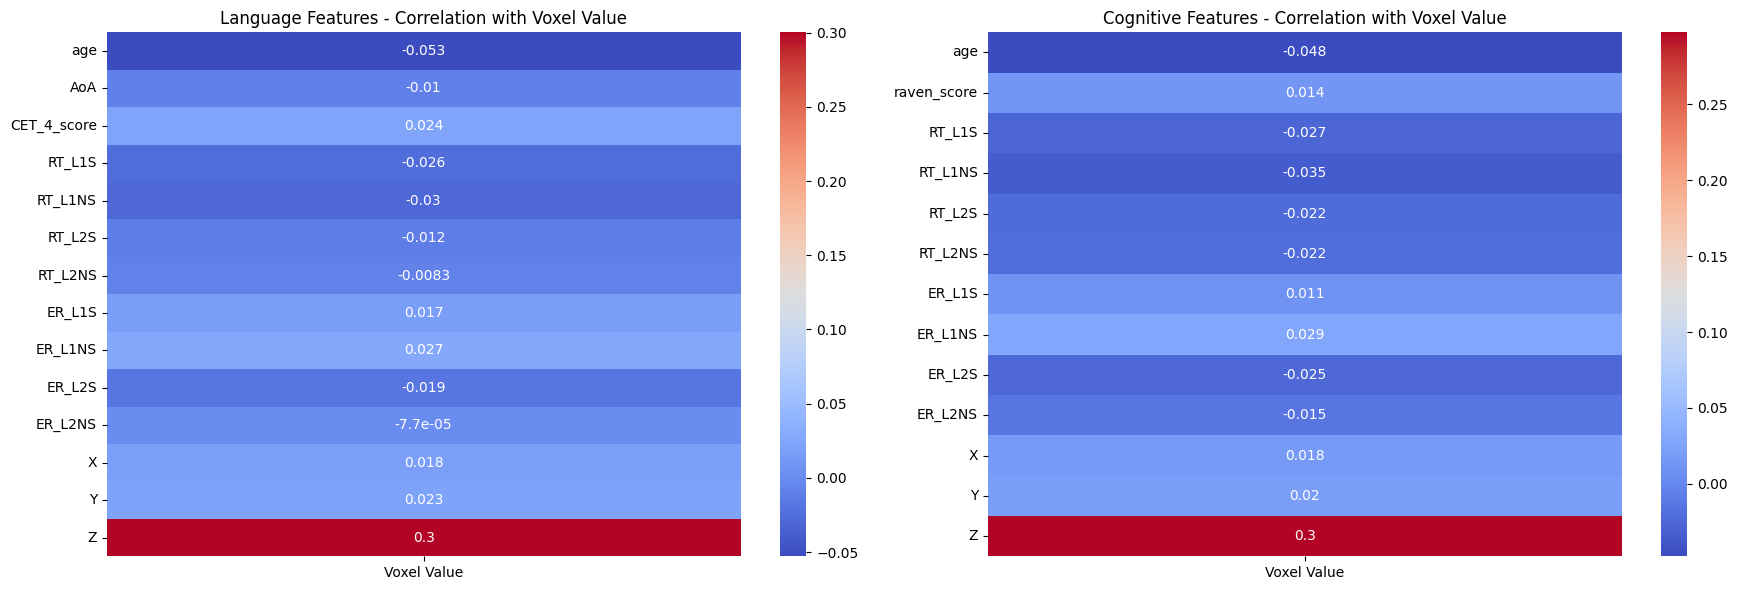

In [42]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap 1: Language-related features
sns.heatmap(
    correlations_lang[['Voxel Value']].drop(index='Voxel Value'),
    annot=True, cmap='coolwarm', ax=axes[0]
)
axes[0].set_title("Language Features - Correlation with Voxel Value")

# Heatmap 2: Cognitive-related features
sns.heatmap(
    correlations_cog[['Voxel Value']].drop(index='Voxel Value'),
    annot=True, cmap='coolwarm', ax=axes[1]
)
axes[1].set_title("Cognitive Features - Correlation with Voxel Value")

plt.tight_layout()
plt.show()



### Brain Region Analysis

Goal: Understand how behavioral metrics relate to tSNR value across regions.

#### Language

In [28]:
# Group by spatial coordinates (voxel region)
voxel_groups = lang.groupby(['X', 'Y', 'Z'])

# Store region-level regression results
region_results = []

# Features to use
predictor_cols = ['age', 'AoA', 'CET_4_score','RT_L1S', 'RT_L1NS', 'RT_L2S', 'RT_L2NS','ER_L1S', 'ER_L1NS', 'ER_L2S', 'ER_L2NS']

train_df = lang[lang['participant_id'].isin(train_participants)].copy()
print(train_df.shape)
test_df = lang[lang['participant_id'].isin(test_participants)].copy()
print(test_df.shape)

(4882551, 16)
(1295287, 16)


In [29]:
# Loop over voxel regions
for (x, y, z), group in voxel_groups:
    if len(group) < 10:
        continue  # skip very small groups to avoid unstable models

    train_group = train_df[(train_df['X'] == x) & (train_df['Y'] == y) & (train_df['Z'] == z)]
    test_group = test_df[(test_df['X'] == x) & (test_df['Y'] == y) & (test_df['Z'] == z)]

    if train_group.empty or test_group.empty:
        print(f"Skipping empty group at ({x}, {y}, {z})")
        continue

     # Extract features and target variables for both train and test sets
    X_train = train_group[predictor_cols]
    X_test = test_group[predictor_cols]

    X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

    y_train = train_group['Voxel Value']
    y_test = test_group['Voxel Value']

    if y_train.nunique() == 1:
        print(f"Skipping constant target at ({x}, {y}, {z})")
        continue


    # Fit model on the training data
    model = sm.OLS(y_train, X_train).fit()

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute R^2 on test data
    r2_test = model.rsquared

    # Get p-value for 'AoA'
    p_AoA = model.pvalues.get('AoA', None)

    # Get p-value for 'CET_4_score'
    p_CET_4 = model.pvalues.get('CET_4_score', None)


    region_results.append({
        'X': x,
        'Y': y,
        'Z': z,
        'R^2': r2_test,
        'p_AoA': p_AoA,
        'p_CET_4_score': p_CET_4,
        'n_obs': len(group)
    })

# Create DataFrame with results
lang_region_df = pd.DataFrame(region_results)

# Sort and display strongest regions by R^2
lang_region_df.sort_values('R^2', ascending=False).head()

Skipping empty group at (2, 30, 15)
Skipping empty group at (2, 30, 17)
Skipping empty group at (6, 41, 12)
Skipping empty group at (7, 47, 14)
Skipping empty group at (10, 13, 28)
Skipping empty group at (10, 35, 31)
Skipping empty group at (11, 10, 26)
Skipping empty group at (11, 33, 32)
Skipping empty group at (11, 49, 26)
Skipping empty group at (12, 50, 26)
Skipping empty group at (13, 55, 23)
Skipping empty group at (14, 4, 19)
Skipping empty group at (14, 24, 34)
Skipping empty group at (14, 25, 34)
Skipping empty group at (15, 4, 21)
Skipping empty group at (16, 13, 31)
Skipping empty group at (17, 50, 12)
Skipping empty group at (18, 32, 35)
Skipping empty group at (18, 33, 35)
Skipping empty group at (18, 44, 12)
Skipping empty group at (19, 16, 3)
Skipping empty group at (19, 29, 6)
Skipping empty group at (20, 16, 3)
Skipping empty group at (20, 19, 2)
Skipping empty group at (20, 23, 2)
Skipping empty group at (20, 25, 3)
Skipping empty group at (20, 30, 6)
Skipping empty

,X,Y,Z,R^2,p_AoA,p_CET_4_score,n_obs
19067,22,28,36,1.000000,NaN,NaN,10
274,4,19,14,1.000000,NaN,NaN,13
285,4,19,25,1.000000,NaN,NaN,12
17012,20,60,20,0.999975,0.004747,0.004719,10
560,4,38,16,0.999947,0.067206,0.016267,14


In [30]:
lang_region_df.to_csv('lang_region_df.csv')

#### Cognitive

In [33]:
# Group by spatial coordinates (voxel region)
voxel_groups = cog.groupby(['X', 'Y', 'Z'])

# Store region-level regression results
region_results = []

# Features to use
predictor_cols = ['age','AoA', 'raven_score', 'RT_L1S', 'RT_L1NS', 'RT_L2S', 'RT_L2NS',
                  'ER_L1S', 'ER_L1NS', 'ER_L2S', 'ER_L2NS']

train_df = cog[cog['participant_id'].isin(train_participants)].copy()
print(train_df.shape)
test_df = cog[cog['participant_id'].isin(test_participants)].copy()
print(test_df.shape)


(4892937, 16)
(1293712, 16)


In [34]:
# Loop over voxel regions
for (x, y, z), group in voxel_groups:
    if len(group) < 10:
        continue  # skip very small groups to avoid unstable models

    train_group = train_df[(train_df['X'] == x) & (train_df['Y'] == y) & (train_df['Z'] == z)]
    test_group = test_df[(test_df['X'] == x) & (test_df['Y'] == y) & (test_df['Z'] == z)]

    if train_group.empty or test_group.empty:
        print(f"Skipping empty group at ({x}, {y}, {z})")
        continue

     # Extract features and target variables for both train and test sets
    X_train = train_group[predictor_cols]
    X_test = test_group[predictor_cols]

    X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

    y_train = train_group['Voxel Value']
    y_test = test_group['Voxel Value']

    if y_train.nunique() == 1:
        print(f"Skipping constant target at ({x}, {y}, {z})")
        continue


    # Fit model on the training data
    model = sm.OLS(y_train, X_train).fit()

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute R^2 on test data
    r2_test = model.rsquared

    # Get p-value for 'raven_score'
    p_raven = model.pvalues.get('raven_score', None)

    # Get p-value for 'AoA'
    p_AoA = model.pvalues.get('AoA', None)


    region_results.append({
        'X': x,
        'Y': y,
        'Z': z,
        'R^2': r2_test,
        'p_raven': p_raven,
        'p_AoA': p_AoA,
        'n_obs': len(group)
    })

# Create DataFrame with results
cog_region_df = pd.DataFrame(region_results)

# Sort and display strongest regions by R^2
cog_region_df.sort_values('R^2', ascending=False).head()

Skipping empty group at (2, 30, 15)
Skipping empty group at (2, 30, 17)
Skipping empty group at (2, 31, 14)
Skipping empty group at (2, 31, 18)
Skipping empty group at (6, 48, 16)
Skipping empty group at (9, 52, 13)
Skipping empty group at (11, 53, 23)
Skipping empty group at (11, 54, 22)
Skipping empty group at (12, 21, 4)
Skipping empty group at (12, 50, 26)
Skipping empty group at (13, 5, 20)
Skipping empty group at (13, 12, 29)
Skipping empty group at (13, 13, 4)
Skipping empty group at (13, 33, 33)
Skipping empty group at (13, 55, 23)
Skipping empty group at (13, 56, 22)
Skipping empty group at (14, 4, 19)
Skipping empty group at (16, 3, 20)
Skipping empty group at (16, 13, 31)
Skipping empty group at (17, 14, 32)
Skipping empty group at (18, 23, 3)
Skipping empty group at (19, 16, 3)
Skipping empty group at (19, 24, 3)
Skipping empty group at (19, 45, 12)
Skipping empty group at (20, 16, 3)
Skipping empty group at (20, 19, 2)
Skipping empty group at (20, 20, 2)
Skipping empty gro

,X,Y,Z,R^2,p_raven,p_AoA,n_obs
5548,11,38,6,1.000000,NaN,NaN,12
5691,11,44,8,1.000000,NaN,NaN,10
39928,39,8,14,0.999894,0.021621,0.009383,10
27331,28,40,34,0.999843,0.009025,0.008778,12
1656,7,19,11,0.999758,0.001911,0.505592,12


In [35]:
cog_region_df.to_csv('cog_region_df.csv')

In [ ]:
top_regions = cog_region_df.sort_values('R^2', ascending=False).head(10)
top_regions.head()

,X,Y,Z,R^2,p_raven,n_obs
79021,31,53,12,1.0,NaN,NaN
5285,10,39,6,1.0,NaN,NaN
70920,25,51,30,1.0,NaN,NaN
5260,10,38,6,1.0,NaN,NaN
38209,35,59,18,1.0,NaN,NaN


In [73]:
high_praven = region_df[region_df['p_raven'] > 0.6 ]
high_r2 = high_praven[high_praven['R^2'] < 0.99 ]
high_r2 = high_r2[high_r2['R^2'] > 0.9 ]
print(high_r2[['X', 'Y', 'Z', 'R^2', 'p_raven']].sort_values('R^2', ascending=False))


         X   Y   Z       R^2   p_raven
89692   41  22  10  0.989182  0.658248
43748   41  22  10  0.989182  0.658248
90987   43  13  20  0.988986  0.795453
45057   43  13  20  0.988986  0.795453
136081  43  13  20  0.988986  0.795453
...     ..  ..  ..       ...       ...
130626  37  10  24  0.900222  0.650390
39457   37  10  24  0.900222  0.650390
136679  44  18  18  0.900160  0.964795
91598   44  18  18  0.900160  0.964795
45670   44  18  18  0.900160  0.964795

[2438 rows x 5 columns]


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    high_r2,
    x='X', y='Y', z='Z',
    color='R^2',
    color_continuous_scale='Viridis',
    title='Voxel Regions with'
)
fig.show()


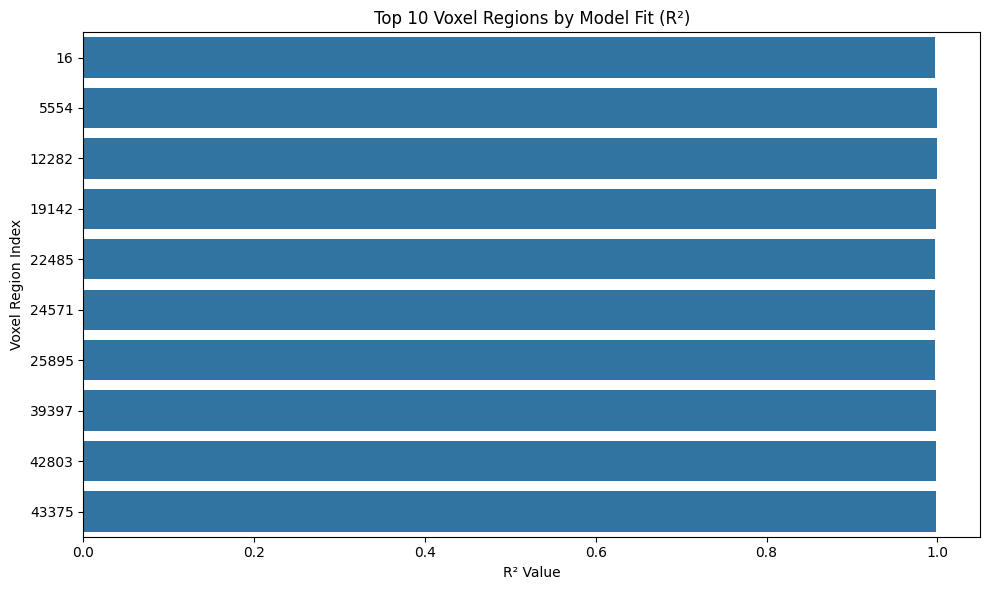

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R^2', y=top_regions.index, data=top_regions, orient='h')
plt.xlabel('R² Value')
plt.ylabel('Voxel Region Index')
plt.title('Top 10 Voxel Regions by Model Fit (R²)')
plt.tight_layout()
plt.show()

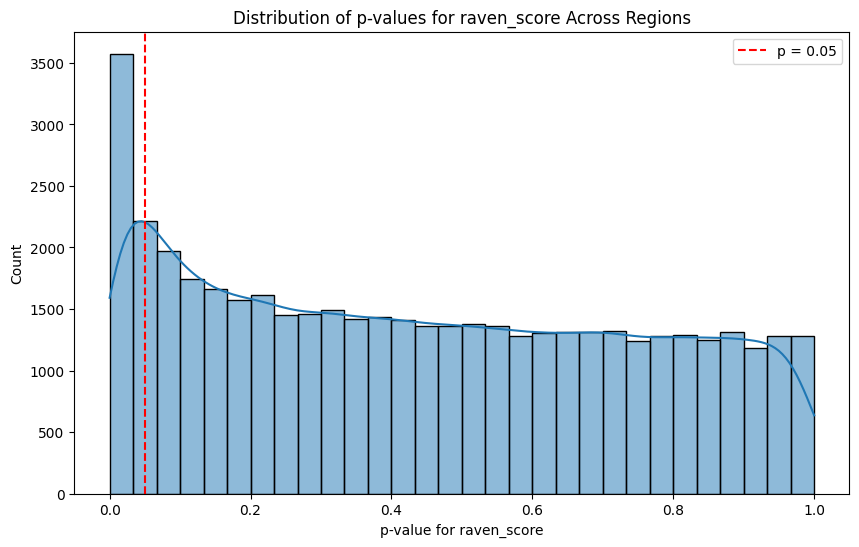

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(region_df['p_raven'].dropna(), bins=30, kde=True)
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.xlabel('p-value for raven_score')
plt.title('Distribution of p-values for raven_score Across Regions')
plt.legend()
plt.show()


In [87]:
import plotly.express as px

fig = px.scatter_3d(
    region_df,
    x='X', y='Y', z='Z',
    color='R^2',
    color_continuous_scale='Viridis',
    size_max=10,
    opacity=0.7,
    title='3D Spatial Distribution of Model Fit (R²) Across Voxel Regions',
    labels={'R^2': 'R² Value'}
)

fig.update_traces(marker=dict(size=4))
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    coloraxis_colorbar=dict(title='R² Value')
)

fig.show()

